In [1]:
# Gathering Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

# Menampilkan beberapa baris pertama dari dataset day_data
print(day_data.head())

# Menampilkan beberapa baris pertama dari dataset hour_data
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [2]:
# Cek missing value
day_data.isnull().sum()
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [3]:
# Cek duplicated data
day_data.duplicated().sum()
hour_data.duplicated().sum()

0

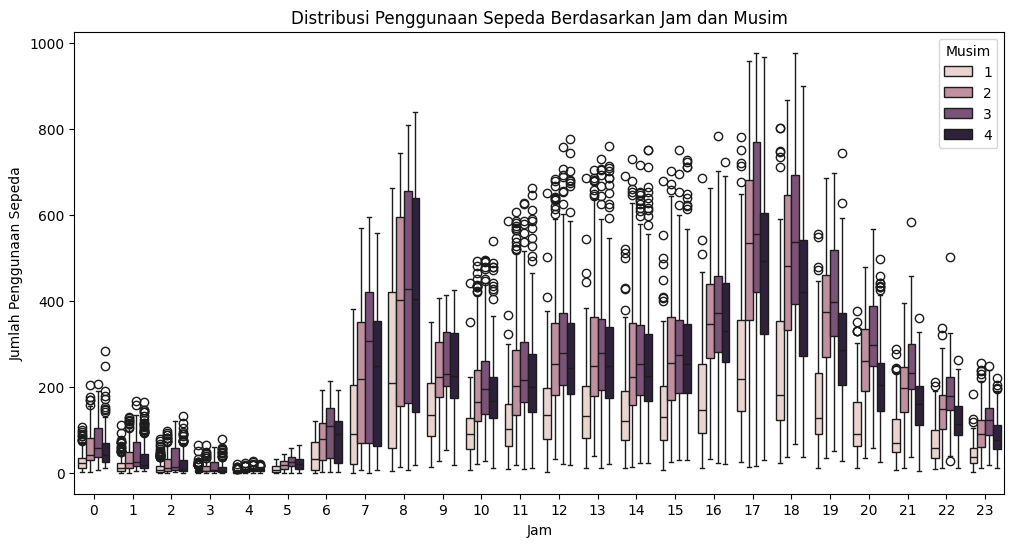

In [4]:
# Pertanyaan 1
# Bagaimana distribusi penggunaan sepeda berdasarkan jam dan musim?

plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_data, x='hr', y='cnt', hue='season')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Jam dan Musim')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.legend(title='Musim')
plt.show()

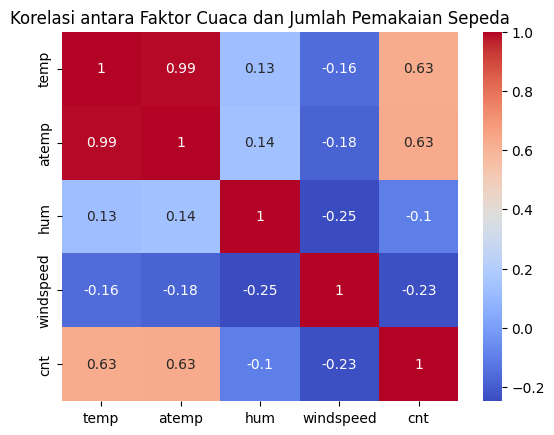

In [5]:
# Pertanyaan 2
# Korelasi antara faktor cuaca dan jumlah pemakaian sepedaplt.figure(figsize=(12, 6))

sns.heatmap(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Pemakaian Sepeda')
plt.show()

In [7]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

st.title('Analisis Penggunaan Sepeda')
# Pertanyaan 1: Distribusi penggunaan sepeda berdasarkan jam dan musim
st.header('Distribusi Penggunaan Sepeda Berdasarkan Jam dan Musim')
fig1 = px.box(hour_data, x='hr', y='cnt', color='season', title='Distribusi Penggunaan Sepeda Berdasarkan Jam dan Musim')
st.plotly_chart(fig1)

# Pertanyaan 2: Korelasi antara faktor cuaca dan jumlah pemakaian sepeda
st.header('Korelasi antara Faktor Cuaca dan Jumlah Pemakaian Sepeda')
corr_matrix = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
fig2 = px.imshow(corr_matrix, text_auto=True, aspect="auto", title='Korelasi antara Faktor Cuaca dan Jumlah Pemakaian Sepeda')
st.plotly_chart(fig2)

Writing app.py


In [14]:
from pyngrok import ngrok
import time

# Menjalankan Streamlit app (Saya menggunakan NPX localturner dikarenakan tidakbisa dibuka secara langsung)
!streamlit run app.py & npx localtunnel --port 8501






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.129.164:8501

npx: installed 22 in 2.579s
your url is: https://rude-carrots-jog.loca.lt
  Stopping...
^C


In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import streamlit as st

# pandas
print("Versi Pandas:", pd.__version__)


# seaborn
print("Versi Seaborn:", sns.__version__)



# streamlit
print("Versi Streamlit:", st.__version__)


Versi Pandas: 2.0.3
Versi Seaborn: 0.13.1
Versi Streamlit: 1.35.0
